In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler
import random
import os

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocessing: Only select class '7' (e.g., airplane class in CIFAR-10)
x_train = x_train[y_train.flatten() == 7]
x_test = x_test[y_test.flatten() == 7]

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data for LSTM input (num_samples, timesteps, features)
# Since CIFAR-10 images are of shape (32, 32, 3), reshape it to (num_samples, timesteps=32, features=32*3)
x_train_reshaped = x_train.reshape(x_train.shape[0], 32, 32 * 3)  # (num_samples, timesteps=32, features=32*3)
x_test_reshaped = x_test.reshape(x_test.shape[0], 32, 32 * 3)  # (num_samples, timesteps=32, features=32*3)

# Feature Scaling: Standardize the data (each pixel value treated as a feature)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_reshaped.reshape(-1, x_train_reshaped.shape[-1]))
x_test_scaled = scaler.transform(x_test_reshaped.reshape(-1, x_test_reshaped.shape[-1]))

# Reshape back into original 3D shape (num_samples, timesteps, features)
x_train_scaled = x_train_scaled.reshape(x_train_reshaped.shape)
x_test_scaled = x_test_scaled.reshape(x_test_reshaped.shape)

# Ensure reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# LSTM Autoencoder model definition
def create_lstm_autoencoder(input_dim, timesteps, latent_dim=64):
    model = models.Sequential()

    # Encoder
    model.add(LSTM(latent_dim, activation='relu', input_shape=(timesteps, input_dim), return_sequences=False))
    model.add(layers.RepeatVector(timesteps))

    # Decoder
    model.add(LSTM(latent_dim, activation='relu', return_sequences=True))
    model.add(LSTM(input_dim, activation='sigmoid', return_sequences=True))

    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse')

    return model

# Create the LSTM Autoencoder model
lstm_autoencoder = create_lstm_autoencoder(input_dim=32 * 3, timesteps=32)  # 32 timesteps, 32*3 features (for 32x32 RGB image)
lstm_autoencoder.summary()

# Train the model
lstm_autoencoder.fit(x_train_scaled, x_train_scaled, epochs=10, batch_size=64, validation_data=(x_test_scaled, x_test_scaled))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_2 (RepeatVector)       │ (None, 32, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 32, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 32, 96)              │          61,824 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,064 (531.50 KB)

 Trainable params: 136,064 (531.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - loss: 1.0452 - val_loss: 0.9669
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 0.9750 - val_loss: 1.0027
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 0.9896 - val_loss: 0.9886
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 0.9807 - val_loss: 0.9806
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 0.9728 - val_loss: 0.9747
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 0.9681 - val_loss: 0.9779
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - loss: 0.9842 - val_loss: 1.0061
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - loss: 0.9988 - val_loss: 1.0054
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - loss: 0.9977 - val_loss: 1.0053
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - loss: 0.9975 - val_loss: 1.0040


In [ ]:
# Predict the reconstructed images
reconstructed_images = lstm_autoencoder.predict(x_test_scaled)

# Calculate the Mean Squared Error (MSE) between the original and reconstructed images
mse = np.mean(np.square(x_test_scaled - reconstructed_images))
print(f"Reconstruction MSE: {mse}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step
Reconstruction MSE: 1.0040026903152466


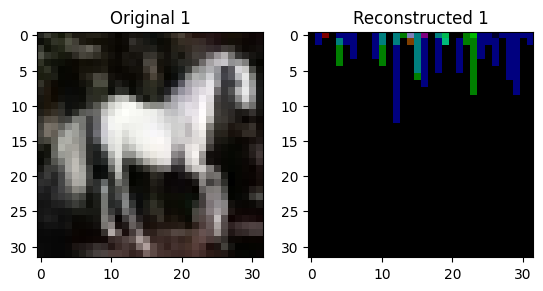

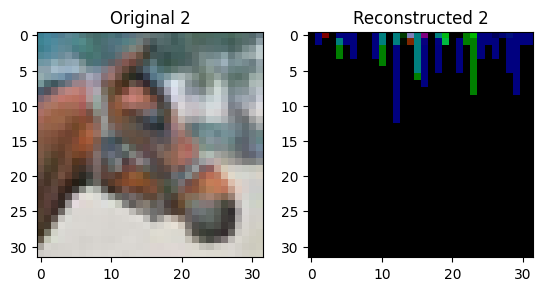

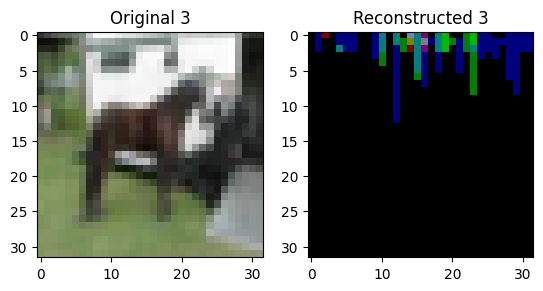

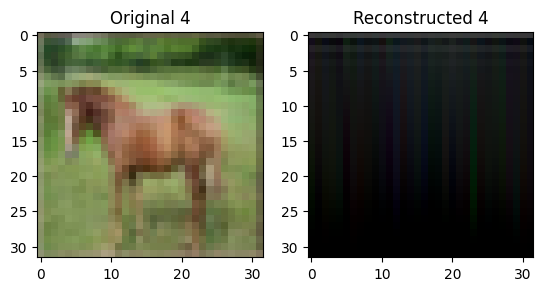

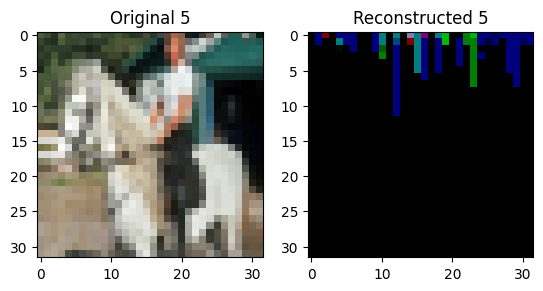

In [ ]:
import matplotlib.pyplot as plt

# Visualize the original and reconstructed images (for the first 5 test samples)
for i in range(5):
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[i])
    plt.title(f"Original {i+1}")

    # Reconstructed image
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_images[i].reshape(32, 32, 3))
    plt.title(f"Reconstructed {i+1}")

    plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 32, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32, 96)              │          61,824 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,064 (531.50 KB)

 Trainable params: 136,064 (531.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 224ms/step - loss: 1.0452 - val_loss: 0.9669
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - loss: 0.9750 - val_loss: 1.0027
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 0.9896 - val_loss: 0.9886
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 0.9807 - val_loss: 0.9806
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.9728 - val_loss: 0.9747
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.9681 - val_loss: 0.9779
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.9842 - val_loss: 1.0061
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - loss: 0.9988 - val_loss: 1.0054
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - loss: 0.9977 - val_loss: 1.0053
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - loss: 0.9975 - val_loss: 1.0040
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 0.9968 - val_loss: 1.0068
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 12

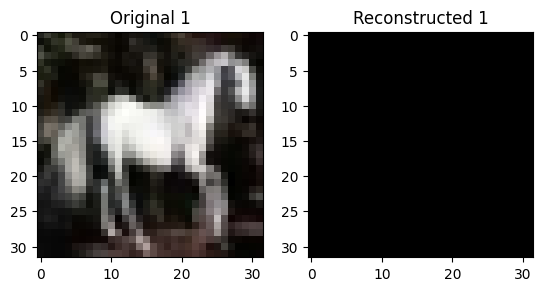

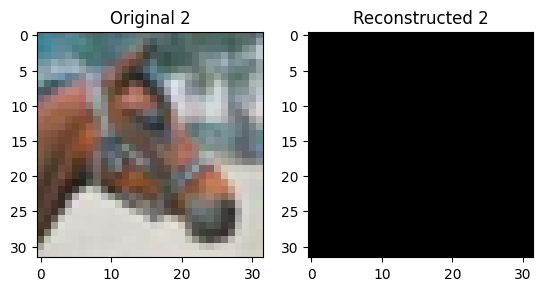

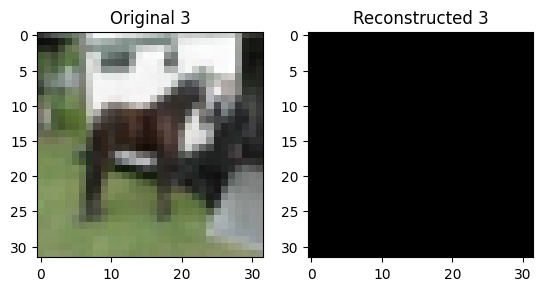

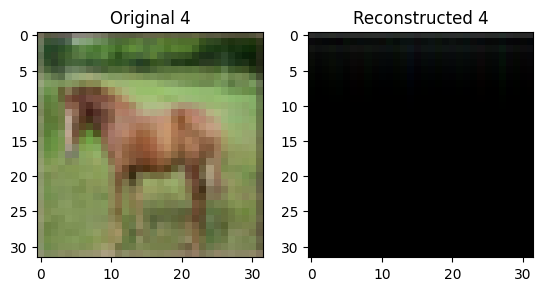

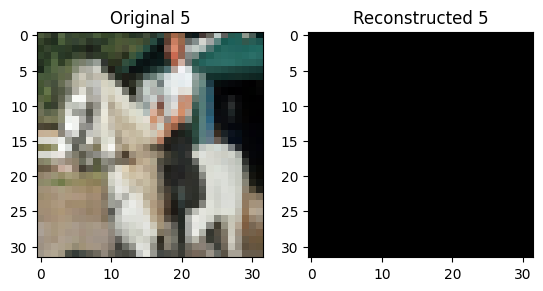

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import LSTM, RepeatVector  # Added LSTM import here
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler
import random
import os
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocessing: Only select class '7' (e.g., airplane class in CIFAR-10)
x_train = x_train[y_train.flatten() == 7]
x_test = x_test[y_test.flatten() == 7]

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data for LSTM input (num_samples, timesteps, features)
# Since CIFAR-10 images are of shape (32, 32, 3), reshape it to (num_samples, timesteps=32, features=32*3)
x_train_reshaped = x_train.reshape(x_train.shape[0], 32, 32 * 3)  # (num_samples, timesteps=32, features=32*3)
x_test_reshaped = x_test.reshape(x_test.shape[0], 32, 32 * 3)  # (num_samples, timesteps=32, features=32*3)

# Feature Scaling: Standardize the data (each pixel value treated as a feature)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_reshaped.reshape(-1, x_train_reshaped.shape[-1]))
x_test_scaled = scaler.transform(x_test_reshaped.reshape(-1, x_test_reshaped.shape[-1]))

# Reshape back into original 3D shape (num_samples, timesteps, features)
x_train_scaled = x_train_scaled.reshape(x_train_reshaped.shape)
x_test_scaled = x_test_scaled.reshape(x_test_reshaped.shape)

# Ensure reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# LSTM Autoencoder model definition
def create_lstm_autoencoder(input_dim, timesteps, latent_dim=64):
    model = models.Sequential()

    # Encoder
    model.add(LSTM(latent_dim, activation='relu', input_shape=(timesteps, input_dim), return_sequences=False))
    model.add(RepeatVector(timesteps))

    # Decoder
    model.add(LSTM(latent_dim, activation='relu', return_sequences=True))
    model.add(LSTM(input_dim, activation='sigmoid', return_sequences=True))

    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse')

    return model

# Create the LSTM Autoencoder model
lstm_autoencoder = create_lstm_autoencoder(input_dim=32 * 3, timesteps=32)  # 32 timesteps, 32*3 features (for 32x32 RGB image)
lstm_autoencoder.summary()

# Train the model
lstm_autoencoder.fit(x_train_scaled, x_train_scaled, epochs=50, batch_size=64, validation_data=(x_test_scaled, x_test_scaled))

# Predict the reconstructed images
reconstructed_images = lstm_autoencoder.predict(x_test_scaled)

# Calculate the Mean Squared Error (MSE) between the original and reconstructed images
mse = np.mean(np.square(x_test_scaled - reconstructed_images))
print(f"Reconstruction MSE: {mse}")

# Visualize the original and reconstructed images (for the first 5 test samples)
for i in range(5):
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[i])
    plt.title(f"Original {i+1}")

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_images[i].reshape(32, 32, 3))
    plt.title(f"Reconstructed {i+1}")

    plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ (None, 32, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 32, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32, 96)              │          61,824 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,064 (531.50 KB)

 Trainable params: 136,064 (531.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - loss: 0.1686 - val_loss: 0.0585
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0524 - val_loss: 0.0445
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0418 - val_loss: 0.0394
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0372 - val_loss: 0.0385
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0354 - val_loss: 0.0336
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0326 - val_loss: 0.0323
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0314 - val_loss: 0.0313
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0305 - val_loss: 0.0306
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.0297 - val_loss: 0.0297
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 0.0289 - val_loss: 0.0289
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0280 - val_loss: 0.0280
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 

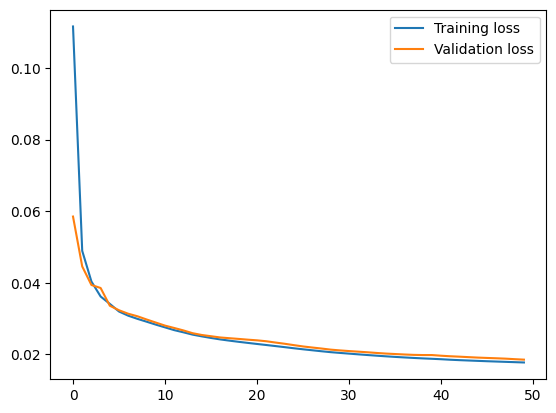

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


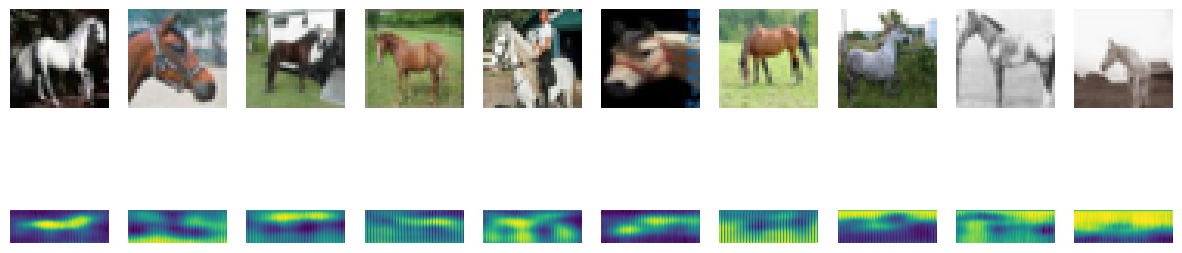

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import LSTM, RepeatVector  # Added LSTM import here
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler
import random
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocessing: Only select class '7' (e.g., airplane class in CIFAR-10)
x_train = x_train[y_train.flatten() == 7]
x_test = x_test[y_test.flatten() == 7]

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data for LSTM input (num_samples, timesteps, features)
# Since CIFAR-10 images are of shape (32, 32, 3), reshape it to (num_samples, timesteps=32, features=32*3)
x_train_reshaped = x_train.reshape(x_train.shape[0], 32, 32 * 3)  # (num_samples, timesteps=32, features=32*3)
x_test_reshaped = x_test.reshape(x_test.shape[0], 32, 32 * 3)  # (num_samples, timesteps=32, features=32*3)

# Feature Scaling: Use MinMaxScaler to scale the data between [0, 1]
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_reshaped.reshape(-1, x_train_reshaped.shape[-1]))
x_test_scaled = scaler.transform(x_test_reshaped.reshape(-1, x_test_reshaped.shape[-1]))

# Reshape back into original 3D shape (num_samples, timesteps, features)
x_train_scaled = x_train_scaled.reshape(x_train_reshaped.shape)
x_test_scaled = x_test_scaled.reshape(x_test_reshaped.shape)

# Ensure reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# LSTM Autoencoder model definition
def create_lstm_autoencoder(input_dim, timesteps, latent_dim=64):
    model = models.Sequential()

    # Encoder
    model.add(LSTM(latent_dim, activation='relu', input_shape=(timesteps, input_dim), return_sequences=False))
    model.add(layers.RepeatVector(timesteps))

    # Decoder
    model.add(LSTM(latent_dim, activation='relu', return_sequences=True))
    model.add(LSTM(input_dim, activation='tanh', return_sequences=True))  # Use tanh for better output scaling

    model.compile(optimizer=optimizers.Adam(learning_rate=0.0005), loss='mse')

    return model

# Create the LSTM Autoencoder model
lstm_autoencoder = create_lstm_autoencoder(input_dim=32 * 3, timesteps=32)  # 32 timesteps, 32*3 features (for 32x32 RGB image)
lstm_autoencoder.summary()

# Train the model
history = lstm_autoencoder.fit(x_train_scaled, x_train_scaled, epochs=50, batch_size=64, validation_data=(x_test_scaled, x_test_scaled))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Evaluate the model on test data and get reconstructed images
reconstructed_images = lstm_autoencoder.predict(x_test_scaled[:10])  # For example, visualize the first 10 images

# Rescale back to [0, 255] for visualization (if using MinMaxScaler)
reconstructed_images_rescaled = reconstructed_images * 255
reconstructed_images_rescaled = np.clip(reconstructed_images_rescaled, 0, 255).astype('uint8')

# Plot the original and reconstructed images side by side
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for i in range(10):
    axes[0, i].imshow(x_test[i])  # Original image
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed_images_rescaled[i])  # Reconstructed image
    axes[1, i].axis('off')
plt.show()
